# Ferromagnetic 2D square lattice XY model using NumPy and Numba

## Import the required libraries.

In [1]:
import numpy as np
from Metropolis_functions import Metropolis
from Observables_functions import get_energy_per_spin_per_lattice
import matplotlib.pyplot as plt

## Initialise the required variables

In [2]:
J = 1 # coupling constant, where it must be > 0 for the system to exhibit ferromagnetism
L = 25 # dimension of the square lattice

tau = 100000 # relaxation time a.k.a equilibrating time
tau_extra = tau*5
nrelax = 15 # total number of times to let the system equilibrate
nframes = 1 # total number of frames in the .gif over the whole simulation (not needed since we are not generating the animated .gif in this notebook)
# N = nrelax * tau # total number of iterations in the Metropolis algorithm
plot_at_Nth_index = np.array([0],dtype=np.int32) # (not needed since we are not generating the animated .gif in this notebook)

lattice = np.zeros((L, L), dtype=np.float64)

Tc = 0.892937 * J  # http://www.lps.ens.fr/~krauth/images/7/72/Stage_Mayer_Johannes_2015.pdf in units of kB
T_init = 0.4*Tc
T_final = 2*Tc
TTc_array = np.linspace(T_init, T_final, nrelax)

## Begin the Metropolis time-marching on the lattice

In [3]:
ave_M2, Cv, _, _ = Metropolis(
    J=J,
    L=L,
    relaxation_time=tau,
    extra_time=tau_extra,
    lattice=lattice,
    T_init=T_init,
    T_final=T_final,
    T_n=nrelax,
    plot_at_Nth_index=plot_at_Nth_index,
    save_for_plot=False)

## Plotting the final lattice

The resulting lattice in phase space and energy space.


Text(0.5, 0.98, '$J$=1. $T$=1.79. $L$=25.')

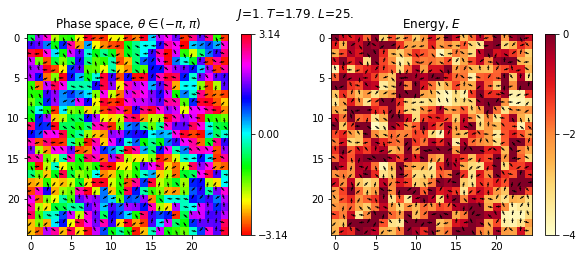

In [4]:
print("The resulting lattice in phase space and energy space.")
X, Y = np.mgrid[0:L, 0:L]
U, V = np.cos(lattice.T), np.sin(
    lattice.T)
E = get_energy_per_spin_per_lattice(
    J, lattice)
fig = plt.figure(figsize=(10, 3.7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.quiver(X,
            Y,
            U,
            V,
            edgecolor='k',
            facecolor='None',
            linewidth=.5)
im1 = ax1.imshow(lattice,
                    vmin=-np.pi,
                    vmax=np.pi,
                    cmap='hsv')
fig.colorbar(im1, ticks=[-3.14, 0, 3.14], ax=ax1)
ax1.set_title("Phase space, $θ\in(-\pi,\pi)$")

ax2.quiver(X,
            Y,
            U,
            V,
            edgecolor='k',
            facecolor='None',
            linewidth=.5)
im2 = ax2.imshow(E, vmin=-4, vmax=0, cmap='YlOrRd')
fig.colorbar(im2, ticks=[-4, -2, 0], ax=ax2)
ax2.set_title("Energy, $E$")
fig.suptitle( f"$J$={J}. $T$={np.round(T_final,2)}. $L$={L}." )

## Calculate the physical observables with the simulation results obtained

## Squared magnetisation

Its expression is given as $\frac{\left\langle M^2\right\rangle}{N^2}=\frac{1}{N^2}\left\langle\left(\sum_{i=1}^{N} \cos \theta_{i}\right)^{2}+\left(\sum_{i=1}^{N} \sin \theta_{i}\right)^{2}\right\rangle$ where $N=L\times L$.

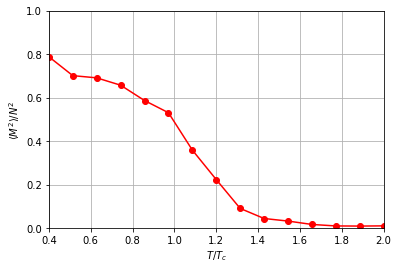

In [22]:
plt.close()
plt.plot(TTc_array/Tc,ave_M2, 'r-o')
plt.xlabel("$T/T_c$")
plt.ylabel("$\langle M^2\\rangle/N^2$")
plt.ylim([0,1])
plt.xlim([T_init/Tc,T_final/Tc])
plt.grid()
plt.savefig(f"simulation_images/magnetisationsquared_L{L}_tau{tau}_nrelax{nrelax}_Tinit{int(T_init/Tc)}_Tfinal{int(T_final/Tc)}.pdf", bbox_inches='tight',transparent=True)

## Specific heat

Its expression is given as $c / k_{\mathrm{B}}=\frac{\left\langle E^{2}\right\rangle-{\langle E\rangle}^{2}}{\left(k_{\mathrm{B}} T\right)^{2}}$ where $k_B$ is the Boltzmann's constant.

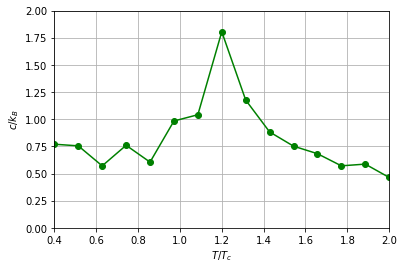

In [23]:
plt.close()
plt.plot( TTc_array/Tc , Cv/((L**2*TTc_array**2)) , 'g-o')
plt.xlabel("$T/T_c$")
plt.ylabel("$c/k_B$")
plt.ylim([0,2])
plt.xlim([T_init/Tc,T_final/Tc])
plt.grid()
plt.savefig(f"simulation_images/specificheat_L{L}_tau{tau}_nrelax{nrelax}_Tinit{int(T_init/Tc)}_Tfinal{int(T_final/Tc)}.pdf", bbox_inches='tight',transparent=True)